### Challenge
At FakeFashionCorp, we're always looking to **improve our product recommendations for our customers**. As a member of our data science team, your task is to make the best recommendations possible based on the provided data:

- **Customer Search Data**: A list of google search queries made by a **specific** customer. You can find the data in the `./search_history.json` file.
- **Product Catalog**: A dataset containing 100,000 **fashion items** from our current inventory, including details such as product name, category, description, and other relevant attributes. You can find the data in the `./fashion_catalog.json` file.

Your challenge is to analyze the customer's search history and use this information to select the most relevant items from our product catalog that we should recommend to this customer.

Here are the specific requirements:

- Select the top items that best match the customer's apparent interests and preferences.
- Provide a brief explanation of your approach, including any assumptions you made and the reasoning behind your methodology.
- Include any visualizations or metrics that support your recommendations.
- Make sure to include the cell output in the final commit, we will **not** execute the script ourselves.

### Dummy approach
The following is what we consider a **dummy** approach. We expect you to find a more clever solution that this:
1. embed the customer's searches
2. rank the searches according to some semantic similarity to a fashion related anchor
3. for each fashion related search, find the product in the catalog that is most similar

We encourage you to be creative in your approach. There's no single correct solution, and we're interested in seeing how you tackle this real-world problem.

Hint: **how can we truly understand the customer's preferences?**

In [3]:
! pip install pandas torch scikit-learn 

^C


In [4]:
print("running the challenge notebook")

test


In [5]:
import pandas as pd

In [6]:
data = pd.read_json("./search_history.json")
catalog_data = pd.read_json("./fashion_catalog.json")

In [33]:
data.head()

,header,title,titleUrl,time,products,activityControls,locationInfos,subtitles,details
0,Search,Visited https://www.businessinsider.com/shivon...,https://www.google.com/url?q=https://www.busin...,2024-06-23T22:21:50.431Z,[Search],[Web & App Activity],NaN,NaN,NaN
1,Search,Visited Elon Musk and Shivon Zilis privately w...,https://www.google.com/url?q=https://www.nbcph...,2024-06-23T22:20:53.934Z,[Search],[Web & App Activity],NaN,NaN,NaN
2,Search,Searched for elon musk shivon zilis,https://www.google.com/search?q=elon+musk+shiv...,2024-06-23T22:20:47.560Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN
3,Search,1 notification,NaN,2024-06-23T17:08:38.542Z,[Search],[Web & App Activity],NaN,"[{'name': 'Including topics:'}, {'name': 'Reut...",NaN
4,Search,Searched for bank station fire alert,https://www.google.com/search?q=bank+station+f...,2024-06-23T16:52:09.311Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN


In [34]:
data[('locationInfos')].value_counts()

locationInfos
[{'name': 'At this general area', 'url': 'https://www.google.com/maps/@?api=1&map_action=map&center=51.504495,-0.011733&zoom=12', 'source': 'From your places (Home)', 'sourceUrl': 'https://support.google.com/maps/answer/3184808'}]    144
[{'name': 'At this general area', 'url': 'https://www.google.com/maps/@?api=1&map_action=map&center=51.525493,-0.082217&zoom=12', 'source': 'From your places (Work)', 'sourceUrl': 'https://support.google.com/maps/answer/3184808'}]     43
[{'name': 'At this general area', 'url': 'https://www.google.com/maps/@?api=1&map_action=map&center=51.504495,-0.011733&zoom=10', 'source': 'From your places (Home)', 'sourceUrl': 'https://support.google.com/maps/answer/3184808'}]     30
[{'name': 'At this general area', 'url': 'https://www.google.com/maps/@?api=1&map_action=map&center=51.525493,-0.082217&zoom=10', 'source': 'From your places (Work)', 'sourceUrl': 'https://support.google.com/maps/answer/3184808'}]      4
[{'name': 'At this general area', 

In [35]:
import pandas as pd
import numpy as np
import re
import ast

# Safely parse strings to Python objects if needed
def safe_parse(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return np.nan
    return x

# Extract location fields
def extract_location_fields(row):
    row = safe_parse(row)
    if isinstance(row, list) and len(row) > 0:
        item = row[0]
        lat, lon = None, None
        url = item.get('url', '')
        match = re.search(r'center=([\d\.-]+),([\d\.-]+)', url)
        if match:
            lat, lon = float(match.group(1)), float(match.group(2))
        return pd.Series({
            'location_name': item.get('name'),
            'latitude': lat,
            'longitude': lon,
            'source': item.get('source'),
            'source_url': item.get('sourceUrl')
        })
    return pd.Series({
        'location_name': None,
        'latitude': None,
        'longitude': None,
        'source': None,
        'source_url': None
    })

# Apply to your DataFrame
location_fields = data['locationInfos'].apply(extract_location_fields)

# Merge back into original dataframe
df = pd.concat([data, location_fields], axis=1)

In [36]:
df.head(10)

,header,title,titleUrl,time,products,activityControls,locationInfos,subtitles,details,location_name,latitude,longitude,source,source_url
0,Search,Visited https://www.businessinsider.com/shivon...,https://www.google.com/url?q=https://www.busin...,2024-06-23T22:21:50.431Z,[Search],[Web & App Activity],NaN,NaN,NaN,None,NaN,NaN,None,None
1,Search,Visited Elon Musk and Shivon Zilis privately w...,https://www.google.com/url?q=https://www.nbcph...,2024-06-23T22:20:53.934Z,[Search],[Web & App Activity],NaN,NaN,NaN,None,NaN,NaN,None,None
2,Search,Searched for elon musk shivon zilis,https://www.google.com/search?q=elon+musk+shiv...,2024-06-23T22:20:47.560Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN,At this general area,51.504495,-0.011733,From your places (Home),https://support.google.com/maps/answer/3184808
3,Search,1 notification,NaN,2024-06-23T17:08:38.542Z,[Search],[Web & App Activity],NaN,"[{'name': 'Including topics:'}, {'name': 'Reut...",NaN,None,NaN,NaN,None,None
4,Search,Searched for bank station fire alert,https://www.google.com/search?q=bank+station+f...,2024-06-23T16:52:09.311Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN,At this general area,51.504495,-0.011733,From your places (Home),https://support.google.com/maps/answer/3184808
5,Search,Searched for bank station fire alert,https://www.google.com/search?q=bank+station+f...,2024-06-23T16:52:00.916Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN,At this general area,51.504495,-0.011733,From your places (Home),https://support.google.com/maps/answer/3184808
6,Search,Searched for mukesh ambani house,https://www.google.com/search?q=mukesh+ambani+...,2024-06-22T20:40:58.305Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN,At this general area,51.504495,-0.011733,From your places (Home),https://support.google.com/maps/answer/3184808
7,Search,Visited Teens could lose bank accounts and dri...,https://www.google.com/url?q=https://www.indep...,2024-06-22T07:59:27.621Z,[Search],[Web & App Activity],NaN,NaN,NaN,None,NaN,NaN,None,None
8,Search,Visited Starmer: Sunak showing 'total lack of ...,https://www.google.com/url?q=https://www.bbc.c...,2024-06-22T07:39:03.396Z,[Search],[Web & App Activity],NaN,NaN,NaN,None,NaN,NaN,None,None
9,Search,Visited Sunak looked like a man who was runnin...,https://www.google.com/url?q=https://www.teleg...,2024-06-22T07:38:38.898Z,[Search],[Web & App Activity],NaN,NaN,NaN,None,NaN,NaN,None,None


In [37]:
df.describe(include='all')

,header,title,titleUrl,time,products,activityControls,locationInfos,subtitles,details,location_name,latitude,longitude,source,source_url
count,55383,55383,55021,55383,55383,55383,226,166,2794,226,226.000000,226.000000,226,225
unique,1,46953,47468,53896,1,1,7,136,2,1,NaN,NaN,3,1
top,Search,Used Search,https://www.google.com,2023-07-16T15:36:40.065Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...","[{'name': 'Test run by Measurement Lab', 'url'...",[{'name': 'From Google Ads'}],At this general area,NaN,NaN,From your places (Home),https://support.google.com/maps/answer/3184808
freq,55383,170,130,3,55383,55383,144,8,2793,226,NaN,NaN,175,225
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.509140,-0.027638,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008735,0.029529,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.504467,-0.082217,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.504495,-0.011733,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.504495,-0.011733,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.504495,-0.011733,NaN,NaN


In [38]:
catalog_data.head(10)

,MAIN_IMAGE,SECOND_IMAGE,THIRD_IMAGE,FOURTH_IMAGE,LYST_PRODUCT_URL,GENDER,CATEGORY,SHORT_DESCRIPTION,LONG_DESCRIPTION
0,https://cdna.lystit.com/photos/wolfandbadger/5...,None,None,None,https://www.lyst.com/shoes/laines-london-class...,F,flats,Classic Laines Slippers With Pearl Beaded Lobs...,Our faux fur cross strap classic slippers offe...
1,https://cdna.lystit.com/photos/farfetch/d774e2...,https://cdna.lystit.com/photos/farfetch/8b088f...,https://cdna.lystit.com/photos/farfetch/6a4008...,None,https://www.lyst.com/clothing/oscar-de-la-rent...,F,skirts,Dahlia Floral-print Midi Skirt,Material:Polyester. This item may not be on sa...
2,https://cdna.lystit.com/photos/ssense/61ba817f...,https://cdna.lystit.com/photos/ssense/2289aeba...,https://cdna.lystit.com/photos/ssense/161426cf...,https://cdna.lystit.com/photos/ssense/b5c625a9...,https://www.lyst.com/clothing/coperni-green-as...,F,dresses,Asymmetric Minidress,Stretch nylon jersey dress. · Single-shoulder ...
3,https://cdna.lystit.com/photos/coach/2fc66504/...,https://cdna.lystit.com/photos/coach/f30d41b1/...,None,None,https://www.lyst.com/accessories/coach-slim-bi...,M,wallets,Slim Billfold Wallet,Crafted of refined leather this slender wallet...
4,https://cdna.lystit.com/photos/amazon-prime/e4...,None,None,None,https://www.lyst.com/clothing/levis-graphic-te...,M,t-shirts,Graphic Tees,A timeless classic you can wear with anything ...
5,https://cdna.lystit.com/photos/yoox/2528fdf4/b...,https://cdna.lystit.com/photos/yoox/d9ea49bc/b...,https://cdna.lystit.com/photos/yoox/2cc2f8e3/b...,https://cdna.lystit.com/photos/yoox/c5fb2140/b...,https://www.lyst.com/shoes/bueno-lace-up-shoes-6,F,flats,Lace-up Shoes,"Leather, embellished, plain colour with appliq..."
6,https://cdna.lystit.com/photos/frmoda/963472c4...,https://cdna.lystit.com/photos/frmoda/92f0fe50...,https://cdna.lystit.com/photos/frmoda/0a18932e...,None,https://www.lyst.com/clothing/jacob-cohen-jean...,F,jeans,Jeans,"Cotton Jeans by Jacob Cohen, baggy wide-leg fi..."
7,https://cdna.lystit.com/photos/asos/ad0ea5be/t...,https://cdna.lystit.com/photos/asos/60d35239/t...,None,None,https://www.lyst.com/clothing/topshop-co-ord-s...,F,tops,Co-ord Stripe Bandeau,Tops by Topshop Welcome to the next phase of T...
8,https://cdna.lystit.com/photos/farfetch/215a34...,https://cdna.lystit.com/photos/farfetch/f2d2d1...,https://cdna.lystit.com/photos/farfetch/ff1bd8...,https://cdna.lystit.com/photos/farfetch/ac06e6...,https://www.lyst.com/clothing/rick-owens-wrap-...,F,dresses,Wrap Gown,Honey brown FSC viscose satin weave wrap desig...
9,https://cdna.lystit.com/photos/thecorner/04e44...,https://cdna.lystit.com/photos/thecorner/c508a...,https://cdna.lystit.com/photos/thecorner/785ed...,https://cdna.lystit.com/photos/thecorner/eb12a...,https://www.lyst.com/shoes/golden-goose-deluxe...,M,sneakers,Stardan Low-Top Sneakers,Iconic suede star-shape side patch Logo patch ...


In [1]:
# ⬇️ NEW CELL — place immediately after the first markdown cell
!pip install -q sentence-transformers tqdm nltk pandas scikit-learn matplotlib
import nltk, warnings, logging, os, json, re, ast, random, math, itertools
warnings.filterwarnings("ignore")
nltk.download('stopwords')
print("✅ libraries installed")


✅ libraries installed


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\horva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
# ⬇️ REPLACEMENT for the old imports cell (remove openai)
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
model = SentenceTransformer("all-MiniLM-L6-v2")
print("✅ embedding model loaded")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ embedding model loaded


In [7]:
# EDA helpers
def pretty_counts(series, top=10):
    return (series.value_counts(dropna=False)
                  .head(top)
                  .to_frame("count")
                  .assign(pct=lambda d: (d["count"]/len(series)).round(3)))
    
print("Search-history range:", data["time"].min(), "→", data["time"].max())
print("\nTop search headers:"); display(pretty_counts(data["header"]))
print("\nTop catalog categories:"); display(pretty_counts(catalog_data["CATEGORY"]))

🔍 Search-history range: 2017-06-08T16:42:55.223Z → 2024-06-23T22:21:50.431Z

Top search headers:


,count,pct
header,,
Search,55383,1.0



Top catalog categories:


,count,pct
CATEGORY,,
tops,8434,0.084
dresses,7651,0.077
sneakers,6961,0.070
pants,6774,0.068
jackets,6700,0.067
t-shirts,5616,0.056
knitwear,5314,0.053
sweats,4470,0.045
flats,3635,0.036


In [8]:
# utils
def clean(text: str) -> str:
    if not isinstance(text, str):  # handle NaNs
        return ""
    text = re.sub(r"http\S+", " ", text)        # strip urls
    text = re.sub(r"[^A-Za-z0-9 ]+", " ", text) # keep alphanum
    tokens = [t.lower() for t in text.split() if t.lower() not in stop_words]
    return " ".join(tokens)

data["clean_query"] = data["title"].apply(clean)
catalog_data["clean_desc"] = (catalog_data["SHORT_DESCRIPTION"].fillna("")
                              + " " +
                              catalog_data["LONG_DESCRIPTION"].fillna("")
                             ).apply(clean)


In [9]:
# core matching logic
query_vecs   = model.encode(data["clean_query"].tolist(),  show_progress_bar=False)
product_vecs = model.encode(catalog_data["clean_desc"].tolist(), show_progress_bar=False)

sim_matrix = cosine_similarity(query_vecs, product_vecs)
# aggregate: take max similarity a product gets from any of the user’s searches
product_scores = sim_matrix.max(axis=0)
catalog_data["relevance"] = product_scores
topk = catalog_data.sort_values("relevance", ascending=False).head(12)\
                   .reset_index(drop=True)
topk[["GENDER","CATEGORY","SHORT_DESCRIPTION","relevance"]]

,GENDER,CATEGORY,SHORT_DESCRIPTION,relevance
0,F,knitwear,Sweater,0.864391
1,M,knitwear,Sweater,0.860565
2,M,boots,Ankle Boots,0.830323
3,F,boots,Ankle Boots,0.830323
4,F,sweats,Cashmere Sweatshirt,0.822617
5,F,totes,Bag,0.812495
6,F,knitwear,Agadir1234 Sweater,0.811379
7,F,knitwear,Jumper,0.810162
8,F,knitwear,V-Neck Knit Jumper,0.808857
9,F,knitwear,Embroidered Wool & Cashmere Jumper,0.807825


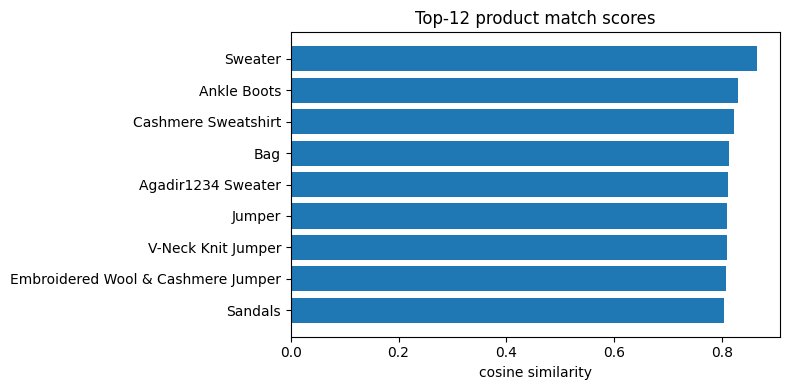

In [11]:
plt.figure(figsize=(8,4))
plt.barh(topk["SHORT_DESCRIPTION"], topk["relevance"])
plt.gca().invert_yaxis(); plt.title("Top-12 product match scores"); plt.xlabel("cosine similarity")
plt.tight_layout() 
plt.show()
